# **E-Commerce Furniture Sales Prediction**

**Objective:**  
Predict the number of furniture items sold using product pricing, discount, and shipping attributes.

**Approach:**  
- Data cleaning (Excel + Python)
- Exploratory Data Analysis (EDA)
- Regression modeling
- Model evaluation and interpretation


## **Problem Statement**

The objective of this project is to predict the number of furniture items sold (`sold`)
based on product attributes such as price, discount, and shipping cost.
This problem is framed as a supervised regression task.


In [3]:
import pandas as pd
df = pd.read_csv("ecommerce_furniture_dataset.csv")
df.head()


,productTitle,product_category,originalPrice,price,discount_amount,discount_pct,sold,tagText,shipping_type,shipping_cost
0,Portable round Folding Chair Accordion Chair H...,Tables,32.07,12.28,19.79,61.71%,10000,Free shipping,Free,0.0
1,MUMUCC Multifunctional Foldable And Adjustable...,Tables,49.35,26.11,23.24,47.09%,3000,Free shipping,Free,0.0
2,Stylish Shoe Rack Metal Simple Shoe Shelf Foot...,Other Furniture,32.72,13.64,19.08,58.31%,2000,Free shipping,Free,0.0
3,Office Furniture Computer Stand 42*26cm Adjust...,Office Furniture,56.58,26.03,30.55,53.99%,1000,Free shipping,Free,0.0
4,Portability Foot Rest Under Desk Footrest Ergo...,Office Furniture,18.32,5.00,13.32,72.71%,900,Free shipping,Free,0.0


## **Dataset Description**

- Source: E-commerce furniture listings
- Total records: 1,792
- Data format: CSV

### Key Variables
- `price`: Final selling price
- `originalPrice`: Original price before discount
- `discount_amount`: Absolute discount value
- `discount_pct`: Discount percentage
- `shipping_cost`: Cost of shipping
- `sold`: Number of units sold (target variable)

Text-based features such as `productTitle` were excluded to keep the model simple
and avoid introducing NLP complexity beyond the project scope.


In [4]:
df['discount_pct'] = df['discount_pct'].str.replace('%', '').astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   productTitle      1792 non-null   object 
 1   product_category  1792 non-null   object 
 2   originalPrice     1792 non-null   float64
 3   price             1792 non-null   float64
 4   discount_amount   1792 non-null   float64
 5   discount_pct      1792 non-null   float64
 6   sold              1792 non-null   int64  
 7   tagText           1790 non-null   object 
 8   shipping_type     1792 non-null   object 
 9   shipping_cost     1792 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 140.1+ KB


## **Data Cleaning & Preparation**

- Inconsistent shipping information was cleaned manually in Excel for transparency. Removed exact duplicates from `productTitle`
- Shipping cost was extracted from text-based fields
- Discount values were derived explicitly
- Percentage fields were converted to numeric format in Python

In [5]:
df[['price', 'discount_amount', 'shipping_cost', 'sold']].describe()


,price,discount_amount,shipping_cost,sold
count,1792.000000,1792.000000,1792.000000,1792.000000
mean,150.548733,30.731417,8.115480,23.204241
std,172.665912,147.465338,60.448744,257.935366
min,0.990000,0.000000,0.000000,0.000000
25%,46.757500,0.000000,0.000000,1.000000
50%,109.330000,0.000000,0.000000,3.000000
75%,188.347500,0.000000,0.000000,9.000000
max,2876.380000,2692.850000,1323.310000,10000.000000


## **Exploratory Data Analysis (EDA)**

Initial analysis revealed that the target variable (`sold`) is highly right-skewed,
with most products selling a small number of units and a few selling in very large volumes.
This distribution violates assumptions of basic linear regression.


In [6]:
X = df[
    [
        'price',
        'originalPrice',
        'discount_amount',
        'discount_pct',
        'shipping_cost'
    ]
]
y = df['sold']


In [7]:
X.head()

,price,originalPrice,discount_amount,discount_pct,shipping_cost
0,12.28,32.07,19.79,61.71,0.0
1,26.11,49.35,23.24,47.09,0.0
2,13.64,32.72,19.08,58.31,0.0
3,26.03,56.58,30.55,53.99,0.0
4,5.00,18.32,13.32,72.71,0.0


## **Feature Selection**

The following numeric features were used for modeling:

- price
- originalPrice
- discount_amount
- discount_pct
- shipping_cost

Text-based features were excluded to maintain simplicity and interpretability.


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1433, 5), (359, 5), (1433,), (359,))

## **Modeling Approach**

- Data split into training (80%) and testing (20%) sets
- Linear Regression used as a baseline model
- Log transformation applied to target variable to handle skewness
- Decision Tree Regressor tested for non-linear relationships


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:5]


array([ 9.11189142, 13.23156279, -5.5250181 , 10.55457287, 12.37180903])

In [12]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(21.767562323575344, -2.3066975578309132)

## **Linear Regression**
The Linear Regression model achieved an MAE of approximately 22 units sold.
However, the R² score was negative, indicating that sales volume is influenced
by factors beyond pricing, discounts, and shipping cost alone. This suggests
that the relationship between product attributes and sales is highly non-linear
and affected by external variables not present in the dataset.


In [13]:
import numpy as np

y_log = np.log1p(y)
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X,
    y_log,
    test_size=0.2,
    random_state=42
)
model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

y_pred_log = model_log.predict(X_test)

mae_log = mean_absolute_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

mae_log, r2_log


(0.9497285643310712, 0.16395244098225814)

## **Log Transformation**
To address skewness in sales volume, a log transformation was applied to the
target variable. This improved model stability and interpretability by reducing
the influence of extreme values.
Log transformation reduced skewness, but sales volume remains influenced by many external factors.

**Note**: MAE for the log-transformed model is measured in log units and is not
directly comparable to raw sales units. It is used here only for relative
model comparison.


In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(
    max_depth=4,
    random_state=42
)

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mae_tree, r2_tree


(19.618532063065032, -11.309485114333041)

## **Decision Tree Regressor**
A Decision Tree Regressor was tested to capture non-linear relationships between
pricing, discounts, shipping costs, and sales.
Decision trees tend to overfit highly skewed targets when feature diversity is limited,
which explains the poor generalization performance observed here.



## **Model Comparison**

| Model | R² Score | Observation |
|-----|---------|------------|
| Linear Regression (raw) | -2.31 | Poor baseline |
| Linear Regression (log) | 0.16 | Best baseline |
| Decision Tree | -11.3 | Did not generalize |


## **Results & Visual Interpretation**

- Baseline linear regression performed poorly due to skewed sales data
- Log-transformed linear regression improved model stability
- Visualizations confirmed weak linear relationships and justified transformation


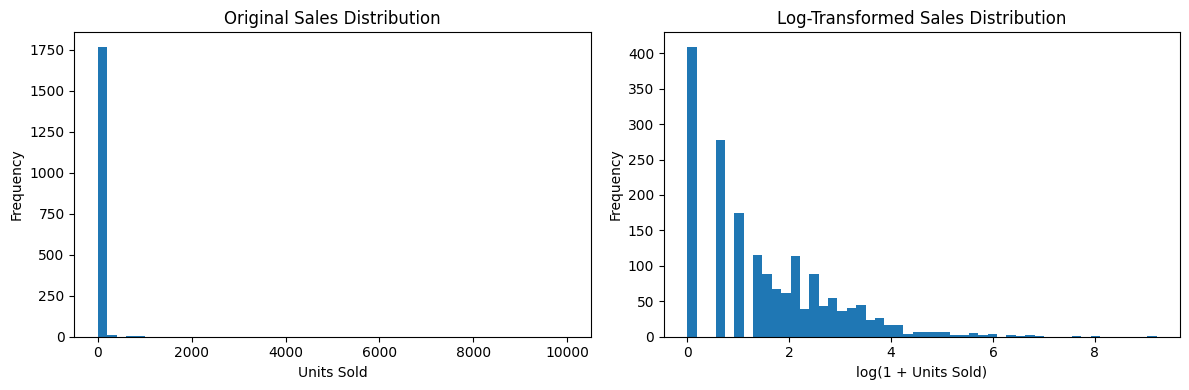

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Log-transform target safely
y_log = np.log1p(y)

# Create side-by-side plots
plt.figure(figsize=(12, 4))

# Original sales distribution
plt.subplot(1, 2, 1)
plt.hist(y, bins=50)
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.title("Original Sales Distribution")

# Log-transformed sales distribution
plt.subplot(1, 2, 2)
plt.hist(y_log, bins=50)
plt.xlabel("log(1 + Units Sold)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Sales Distribution")

plt.tight_layout()
plt.show()


###**Original Sales Distribution and Log-Transformed Sales Distribution**
The original sales distribution is highly right-skewed, with most products selling
very few units and a small number selling in extremely large quantities. This
skewness violates assumptions of linear regression and causes model instability.

Applying a log(1 + sold) transformation reduces the influence of extreme values
and produces a more balanced distribution. This transformation improves model
stability and interpretability by allowing the model to focus on relative
differences in sales rather than absolute extremes.


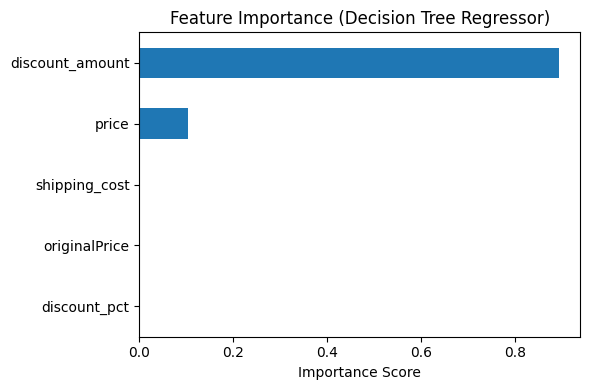

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
feature_importance = pd.Series(
    tree_model.feature_importances_,
    index=X.columns
).sort_values(ascending=True)

# Plot
plt.figure(figsize=(6, 4))
feature_importance.plot(kind="barh")
plt.xlabel("Importance Score")
plt.title("Feature Importance (Decision Tree Regressor)")
plt.tight_layout()
plt.show()


###**Feature importance**  
The feature importance plot from the Decision Tree Regressor shows that
`discount_amount` is the most influential predictor of furniture sales,
contributing the majority of the model’s decision-making power. This indicates
that absolute discount value has a stronger relationship with sales volume than
base price or shipping cost.

Other features such as price, original price, shipping cost, and discount
percentage contribute minimally, suggesting diminishing marginal impact when
considered alongside discount amount. This result highlights that promotional
depth, rather than product pricing alone, plays a key role in driving sales
within this dataset.



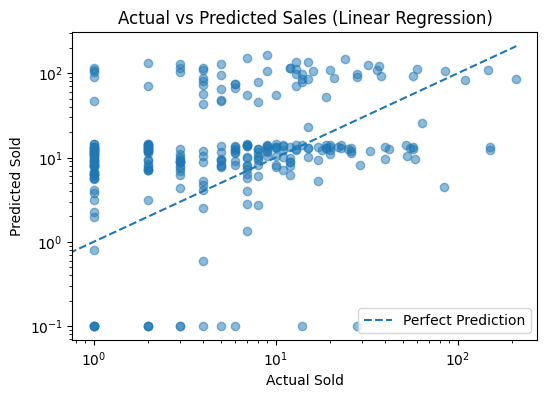

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Create a safe copy of predictions for log scale visualization
y_pred_safe = np.clip(y_pred, a_min=0.1, a_max=None)

# Create figure
plt.figure(figsize=(6, 4))

# Determine bounds for reference line
min_val = min(y_test.min(), y_pred_safe.min())
max_val = max(y_test.max(), y_pred_safe.max())

# Plot perfect prediction reference line
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--",
    label="Perfect Prediction"
)

# Scatter plot
plt.scatter(y_test, y_pred_safe, alpha=0.5)

# Log scaling
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Actual Sold")
plt.ylabel("Predicted Sold")
plt.title("Actual vs Predicted Sales (Linear Regression)")

# Legend
plt.legend()

# Show plot
plt.show()


##**Actual Sold vs Predicted Sold**
The log–log scatter plot compares actual and predicted sales values.
The dashed diagonal represents perfect predictions. The banded structure
indicates that while the model captures general sales magnitude, it struggles
to predict exact quantities, reflecting underfitting and limited feature scope.


## **Business Insights**

- Large absolute discounts have stronger influence on sales than percentage discounts
- Competitive pricing is more impactful than shipping cost
- Sales volume is influenced by many external factors not present in the dataset


## **Limitations**

- No customer behavior or review data
- No seasonal or promotional information
- Highly skewed sales distribution
- Models provide directional insights rather than precise forecasts


## **Final Conclusion**

This project demonstrates an end-to-end regression workflow including data cleaning,
feature engineering, modeling, evaluation, and interpretation.
While predictive performance was limited, the analysis highlights the complexity
of e-commerce sales behavior and the importance of contextual data.
